In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
%matplotlib inline

In [3]:
df=pd.read_csv('./economic_data.csv');
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2020,January,2.5,5.0,3000
1,2021,February,2.6,5.1,3100
2,2022,March,2.7,5.2,3200
3,2023,April,2.8,5.3,3300
4,2024,May,2.9,5.4,3400


In [4]:
#drop unnecessary columns
df.drop(['year', 'month'], axis=1, inplace=True);
df.head()

,interest_rate,unemployment_rate,index_price
0,2.5,5.0,3000
1,2.6,5.1,3100
2,2.7,5.2,3200
3,2.8,5.3,3300
4,2.9,5.4,3400


In [5]:
df.isnull().sum()   

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

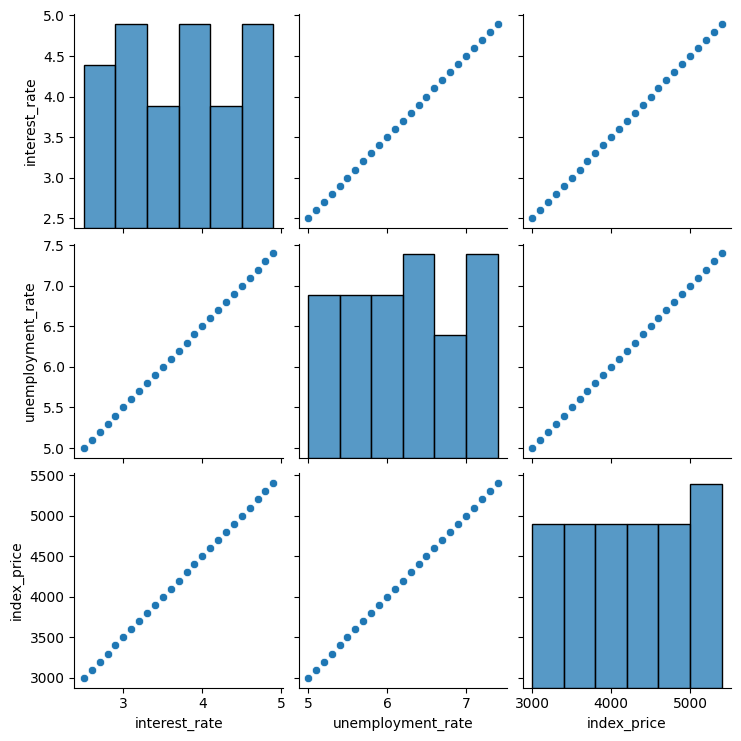

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.0,1.0,1.0
unemployment_rate,1.0,1.0,1.0
index_price,1.0,1.0,1.0


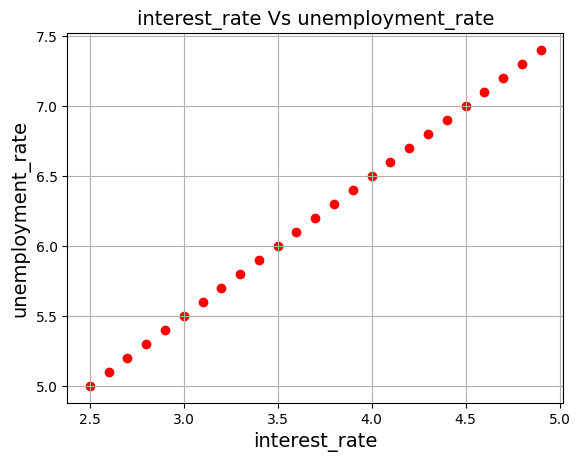

In [9]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='red')
plt.title('interest_rate Vs unemployment_rate', fontsize=14)
plt.xlabel('interest_rate', fontsize=14)
plt.ylabel('unemployment_rate', fontsize=14)
plt.grid(True)

In [10]:
##get independent and dependent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.5,5.0
1,2.6,5.1
2,2.7,5.2
3,2.8,5.3
4,2.9,5.4


In [12]:
y

0     3000
1     3100
2     3200
3     3300
4     3400
5     3500
6     3600
7     3700
8     3800
9     3900
10    4000
11    4100
12    4200
13    4300
14    4400
15    4500
16    4600
17    4700
18    4800
19    4900
20    5000
21    5100
22    5200
23    5300
24    5400
Name: index_price, dtype: int64

In [13]:
##split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

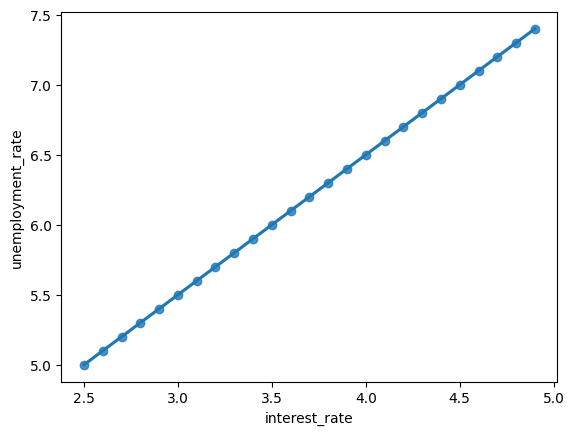

In [15]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=df)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error' ,cv=3)

In [20]:
np.mean(validation_score)

np.float64(-2.29772392375841e-25)

In [21]:
y_pred=regression.predict(X_test)

In [22]:
#Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 1.6543612251060554e-25
Mean Absolute Error: 1.8189894035458566e-13
Root Mean Squared Error: 4.067383956680332e-13


In [23]:
##R2 Score
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 1.0


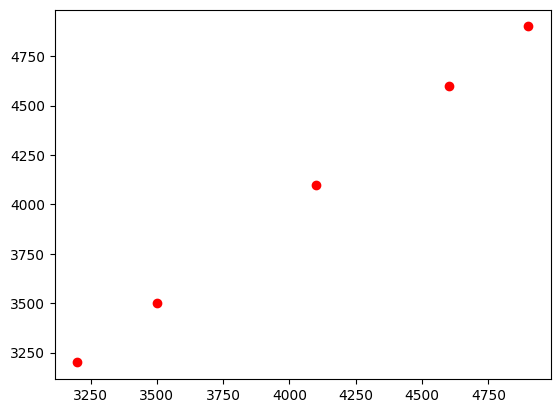

In [24]:
plt.scatter(y_test, y_pred, color='red')

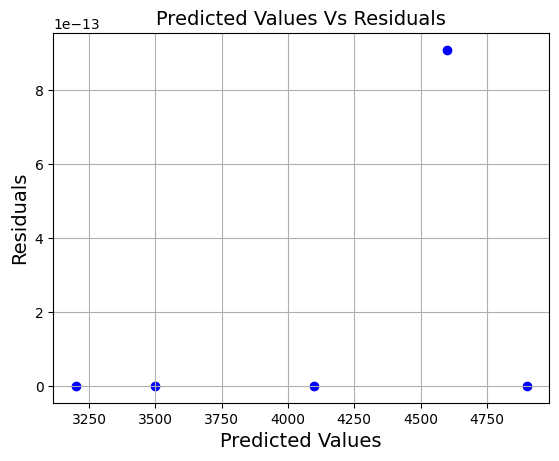

In [25]:
#Scatter plot of the predicted values and the residuals
plt.scatter(y_pred, y_test-y_pred, color='blue')
plt.title('Predicted Values Vs Residuals', fontsize=14)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
